# Import

In [2]:
import os, cv2, re, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras import backend as K
from keras.utils import np_utils


Using TensorFlow backend.


# Data dimensions and paths



In [3]:
categories = ['cats','dogs']

In [4]:
img_width = 55
img_height = 55
TRAIN_DIR = './data/CvD/train/'
TEST_DIR = './data/CvD/test/'
train_images_dogs_cats = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
test_images_dogs_cats = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

# Generate Labels

In [5]:
def prepare_data(list_of_images):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    x = [] # images as arrays
    y = [] # labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image), (img_width,img_height)))
    
    for i in list_of_images:
        if 'dog' in i:
            y.append(1)
        elif 'cat' in i:
            y.append(0)
        #else:
            #print('neither cat nor dog name present in images')
            
    return x, y

In [6]:
X, Y = prepare_data(train_images_dogs_cats)

In [7]:
print(K.image_data_format())

channels_last


In [8]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(X, dtype="float") / 255.0
labels = np.array(Y)

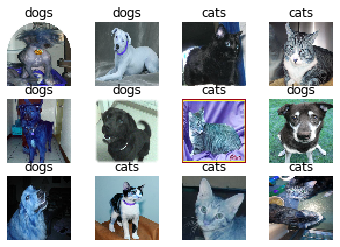

In [9]:
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

# Split dataset into train and test set

In [21]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [22]:
# Preprocess class labels
# trainY = np_utils.to_categorical(trainY, 2)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(20000, 55, 55, 3)
(5000, 55, 55, 3)
(20000,)
(5000,)


# Load Model 

In [36]:
# from keras.applications.vgg16 import VGG16
# from keras.optimizers import Adam
# from keras.models import Sequential
from keras import layers
from keras.models import Model

N_CHANNELS = 3

# model = Sequential()
# model.add(layers.Conv2D(32, (3, 3), input_shape=(img_height , img_width, N_CHANNELS)))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Conv2D(32, (3, 3)))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Conv2D(64, (3, 3)))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Flatten())
# model.add(layers.Dense(64))
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(1))
# model.add(layers.Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# model.summary()

#model = load_model('TvW.h5')

# VGG16

In [42]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(img_height , img_width, N_CHANNELS), weights='imagenet', include_top=False)
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(1, activation='sigmoid')(x)
output = layers.Activation('sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = np.round(pred) # return to label
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

Accuracy : 48.42%


# VGG19

In [43]:
from keras.applications.vgg19 import VGG19
base_model = VGG19(input_shape=(img_height , img_width, N_CHANNELS), weights='imagenet', include_top=False)
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(1, activation='sigmoid')(x)
output = layers.Activation('sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = np.round(pred) # return to label
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

80142336/80134624 [==============================] - 2s 0us/step
Accuracy : 48.42%


# ResNet50

In [44]:
from keras.applications.resnet50 import ResNet50
base_model = ResNet50(input_shape=(img_height , img_width, N_CHANNELS), weights='imagenet', include_top=False)
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(1, activation='sigmoid')(x)
output = layers.Activation('sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = np.round(pred) # return to label
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

/opt/conda/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 5s 0us/step
Accuracy : 48.42%


# Xception

In [45]:
from keras.applications.xception import Xception
base_model = Xception(input_shape=(img_height , img_width, N_CHANNELS), weights='imagenet', include_top=False)
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(1, activation='sigmoid')(x)
output = layers.Activation('sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = np.round(pred) # return to label
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

ValueError: Input size must be at least 71x71; got `input_shape=(55, 55, 3)`

# MobileNet

In [ ]:
from keras.applications.mobilenet import MobileNet
base_model = MobileNet(input_shape=(img_height , img_width, N_CHANNELS), weights='imagenet', include_top=False)
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(1, activation='sigmoid')(x)
output = layers.Activation('sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = np.round(pred) # return to label
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

# Fit model on training data

In [17]:
#model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)


# Evaluate model on test data

In [18]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)

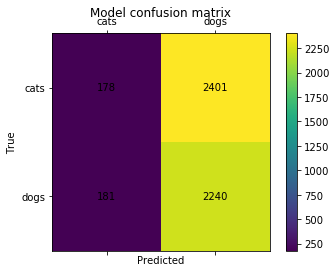

Accuracy : 48.36%


In [19]:
predictions = np.round(pred) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(2):
    for j in range(2):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

# Save Model

In [15]:
#model.save("CvD.h5")